In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset 
df = pd.read_csv('Data_inc.csv')
df.head(15)

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#some of the columns are starts with spaces and some are not in standard format. so, renaming few columns
df.rename(columns={'Profession Class':'Profession_Class',' Education': 'Education',' Education-num':'Education_num',
                   ' marital-status':'Marital_Status',' occupation':'Occupation',' relationship':'Relationship',
                   ' race':'Race',' capital-gain':'Capital_Gain',' capital-loss':'Capital_loss',' hours-per-week':'Hours_Per_Week',
                   ' country':'Country','Final_census':'Final_Census',' income':'Income'}, inplace=True)
df.columns

Index(['Age', 'Profession_Class', 'Final_Census', 'Education', 'Education_num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_loss', 'Hours_Per_Week', 'Country', 'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession_Class  32561 non-null  object
 2   Final_Census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education_num     32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_loss      32561 non-null  int64 
 12  Hours_Per_Week    32561 non-null  int64 
 13  Country           32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#check the dataset have the "?" values in dataset
df.isin([' ?']).sum()

Age                    0
Profession_Class    1836
Final_Census           0
Education              0
Education_num          0
Marital_Status         0
Occupation          1843
Relationship           0
Race                   0
Gender                 0
Capital_Gain           0
Capital_loss           0
Hours_Per_Week         0
Country              583
Income                 0
dtype: int64

In [7]:
#Number of null values in the dataset column wise
df.isnull().sum()

Age                 0
Profession_Class    0
Final_Census        0
Education           0
Education_num       0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital_Gain        0
Capital_loss        0
Hours_Per_Week      0
Country             0
Income              0
dtype: int64

In [8]:
#Replace the "?" to "NaN"
df[df == ' ?'] = np.nan

In [9]:
#Recheck the dataset have the "?" values in dataset
df.isin([' ?']).sum()

Age                 0
Profession_Class    0
Final_Census        0
Education           0
Education_num       0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital_Gain        0
Capital_loss        0
Hours_Per_Week      0
Country             0
Income              0
dtype: int64

In [10]:
#check the Number of null values in the dataset column wise
df.isnull().sum()

Age                    0
Profession_Class    1836
Final_Census           0
Education              0
Education_num          0
Marital_Status         0
Occupation          1843
Relationship           0
Race                   0
Gender                 0
Capital_Gain           0
Capital_loss           0
Hours_Per_Week         0
Country              583
Income                 0
dtype: int64

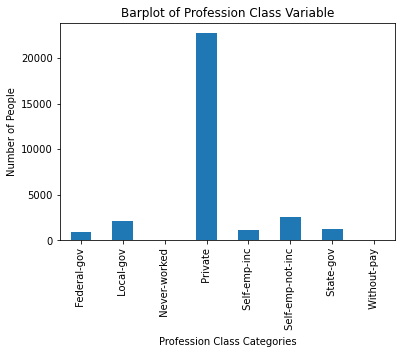

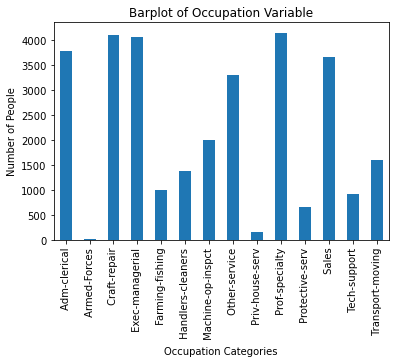

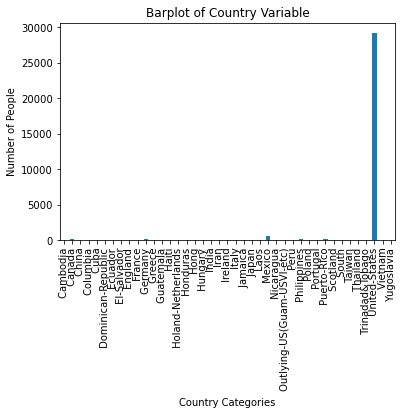

In [11]:
# Grouping the Profession_Class
df.groupby(['Profession_Class']).size().plot(kind = "bar")
plt.xlabel('Profession Class Categories')
plt.ylabel('Number of People')
plt.title('Barplot of Profession Class Variable')
plt.show()

# Grouping the Occupation
df.groupby(['Occupation']).size().plot(kind = "bar")
plt.xlabel('Occupation Categories')
plt.ylabel('Number of People')
plt.title('Barplot of Occupation Variable')
plt.show()

# Grouping the Country
df.groupby(['Country']).size().plot(kind = "bar")
plt.xlabel('Country Categories')
plt.ylabel('Number of People')
plt.title('Barplot of Country Variable')
plt.show()

In [12]:
#Impute the data for Profession class, occupation, and country columns with "Mode"
for col in ['Profession_Class', 'Occupation', 'Country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
#Recheck the Number of null values in the dataset column wise
df.isnull().sum()

Age                 0
Profession_Class    0
Final_Census        0
Education           0
Education_num       0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Gender              0
Capital_Gain        0
Capital_loss        0
Hours_Per_Week      0
Country             0
Income              0
dtype: int64

In [14]:
#check the duplicate records in dataset
df.duplicated().sum()

24

In [15]:
#Drop those duplicate records in dataset
df = df.drop_duplicates()

In [16]:
df.shape

(32537, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32537 non-null  int64 
 1   Profession_Class  32537 non-null  object
 2   Final_Census      32537 non-null  int64 
 3   Education         32537 non-null  object
 4   Education_num     32537 non-null  int64 
 5   Marital_Status    32537 non-null  object
 6   Occupation        32537 non-null  object
 7   Relationship      32537 non-null  object
 8   Race              32537 non-null  object
 9   Gender            32537 non-null  object
 10  Capital_Gain      32537 non-null  int64 
 11  Capital_loss      32537 non-null  int64 
 12  Hours_Per_Week    32537 non-null  int64 
 13  Country           32537 non-null  object
 14  Income            32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [18]:
#description of the datset
df.describe()

,Age,Final_Census,Education_num,Capital_Gain,Capital_loss,Hours_Per_Week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


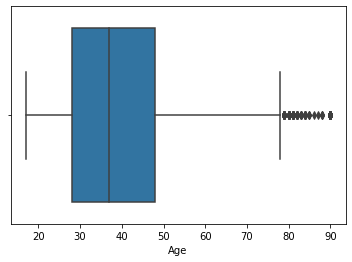

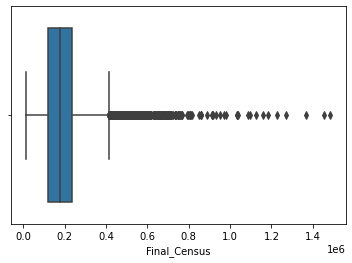

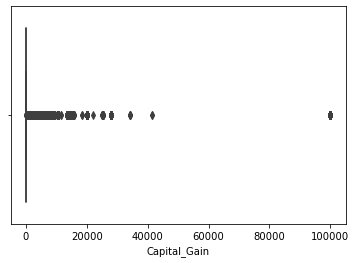

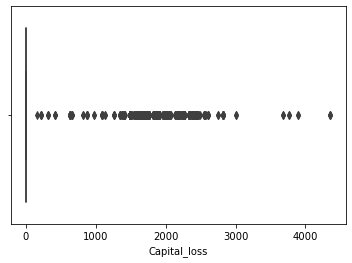

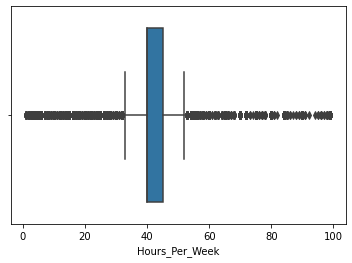

In [19]:
#check the outliers using Box plot
int_columns = ['Age','Final_Census','Capital_Gain','Capital_loss','Hours_Per_Week']
for i in int_columns:
    sns.boxplot(x = df[i])
    plt.show()

In [20]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [21]:
#Outlier records
df[(df.Age<lower_limit)|(df.Age> upper_limit)]

,Age,Profession_Class,Final_Census,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_loss,Hours_Per_Week,Country,Income
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,Private,107762,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32494,82,Private,403910,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,3,United-States,<=50K


In [22]:
#Since we have only 142 outliers. so, we can remove the outlier records from the dataset
df = df[(df.Age>lower_limit)&(df.Age<upper_limit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32372 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32372 non-null  int64 
 1   Profession_Class  32372 non-null  object
 2   Final_Census      32372 non-null  int64 
 3   Education         32372 non-null  object
 4   Education_num     32372 non-null  int64 
 5   Marital_Status    32372 non-null  object
 6   Occupation        32372 non-null  object
 7   Relationship      32372 non-null  object
 8   Race              32372 non-null  object
 9   Gender            32372 non-null  object
 10  Capital_Gain      32372 non-null  int64 
 11  Capital_loss      32372 non-null  int64 
 12  Hours_Per_Week    32372 non-null  int64 
 13  Country           32372 non-null  object
 14  Income            32372 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [23]:
#Detailed description of the datset
df.describe(include='all')

,Age,Profession_Class,Final_Census,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_loss,Hours_Per_Week,Country,Income
count,32372.000000,32372,3.237200e+04,32372,32372.000000,32372,32372,32372,32372,32372,32372.000000,32372.000000,32372.000000,32372,32372
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24398,NaN,10439,NaN,14889,5915,13111,27646,21660,NaN,NaN,NaN,29586,24563
mean,38.358829,NaN,1.899240e+05,NaN,10.085197,NaN,NaN,NaN,NaN,NaN,1074.579884,87.147442,40.505066,NaN,NaN
std,13.292902,NaN,1.056126e+05,NaN,2.565439,NaN,NaN,NaN,NaN,NaN,7380.668389,401.694204,12.285919,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178702e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.785135e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.372960e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [24]:
df.Education.value_counts()

 HS-grad         10439
 Some-college     7265
 Bachelors        5331
 Masters          1711
 Assoc-voc        1377
 11th             1170
 Assoc-acdm       1063
 10th              929
 7th-8th           625
 Prof-school       569
 9th               512
 12th              432
 Doctorate         409
 5th-6th           328
 1st-4th           162
 Preschool          50
Name: Education, dtype: int64

In [25]:
df.Education_num.value_counts()

9     10439
10     7265
13     5331
14     1711
11     1377
7      1170
12     1063
6       929
4       625
15      569
5       512
8       432
16      409
3       328
2       162
1        50
Name: Education_num, dtype: int64

In [26]:
df.groupby('Education')['Education_num'].value_counts(dropna=False)

Education      Education_num
 10th          6                  929
 11th          7                 1170
 12th          8                  432
 1st-4th       2                  162
 5th-6th       3                  328
 7th-8th       4                  625
 9th           5                  512
 Assoc-acdm    12                1063
 Assoc-voc     11                1377
 Bachelors     13                5331
 Doctorate     16                 409
 HS-grad       9                10439
 Masters       14                1711
 Preschool     1                   50
 Prof-school   15                 569
 Some-college  10                7265
Name: Education_num, dtype: int64

In [27]:
df.drop("Education_num",axis=1,inplace=True)

In [28]:
df.shape

(32372, 14)

In [29]:
#check the target varibale counts
df.Income.value_counts()

 <=50K    24563
 >50K      7809
Name: Income, dtype: int64

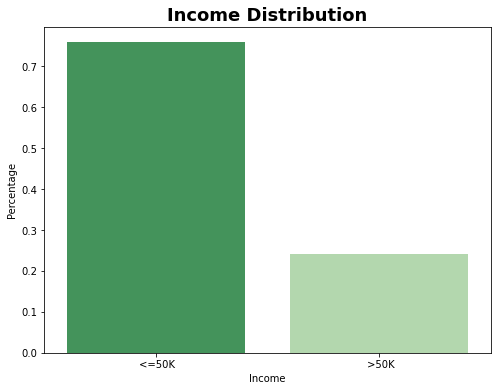

In [30]:
plt.figure(figsize = (8,6))
plt.title('Income Distribution', fontsize=18, fontweight='bold')
eda_percentage = df['Income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage, palette='Greens_r')

In [31]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['Age_group'] = df['Age'].apply(age_group)

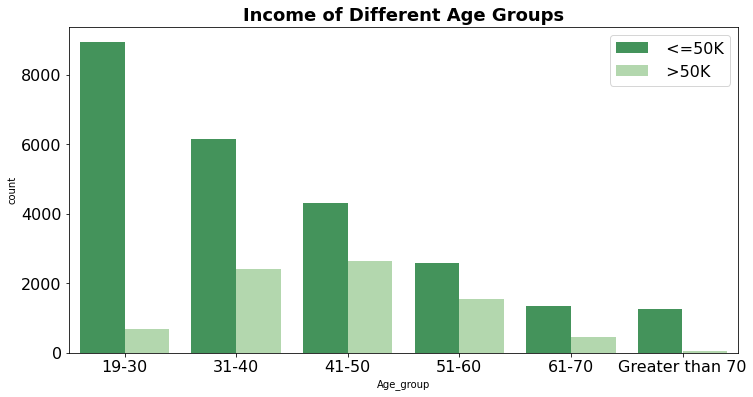

In [32]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(df['Age_group'], hue = df['Income'], palette='Greens_r', order = order_list)
plt.title('Income of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

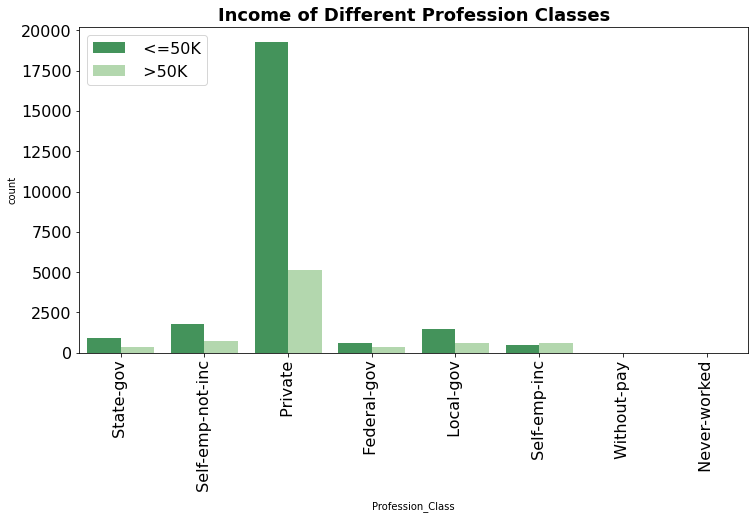

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(df['Profession_Class'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Different Profession Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

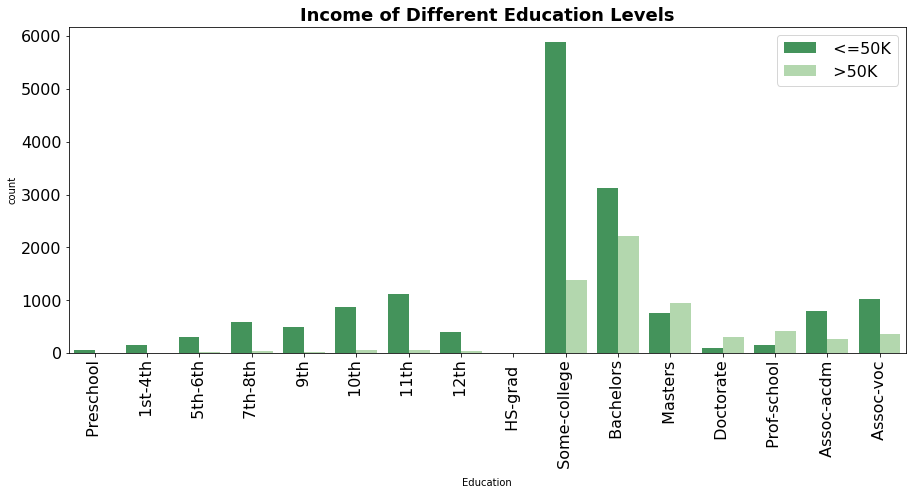

In [34]:
plt.figure(figsize=(15,6))
order_list = [' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', 
              ' HS-grad ', ' Some-college', ' Bachelors', ' Masters', ' Doctorate', ' Prof-school', 
              ' Assoc-acdm', ' Assoc-voc']
sns.countplot(df['Education'], hue = df['Income'], palette='Greens_r', order= order_list)
plt.title('Income of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

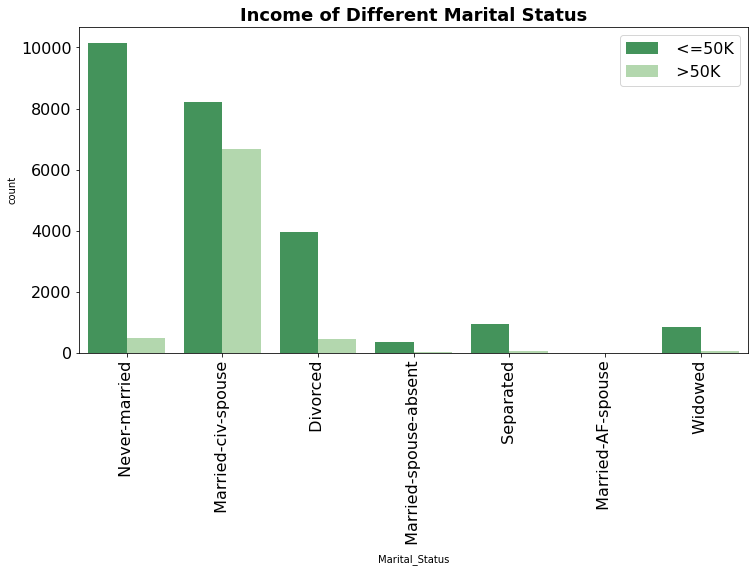

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(df['Marital_Status'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

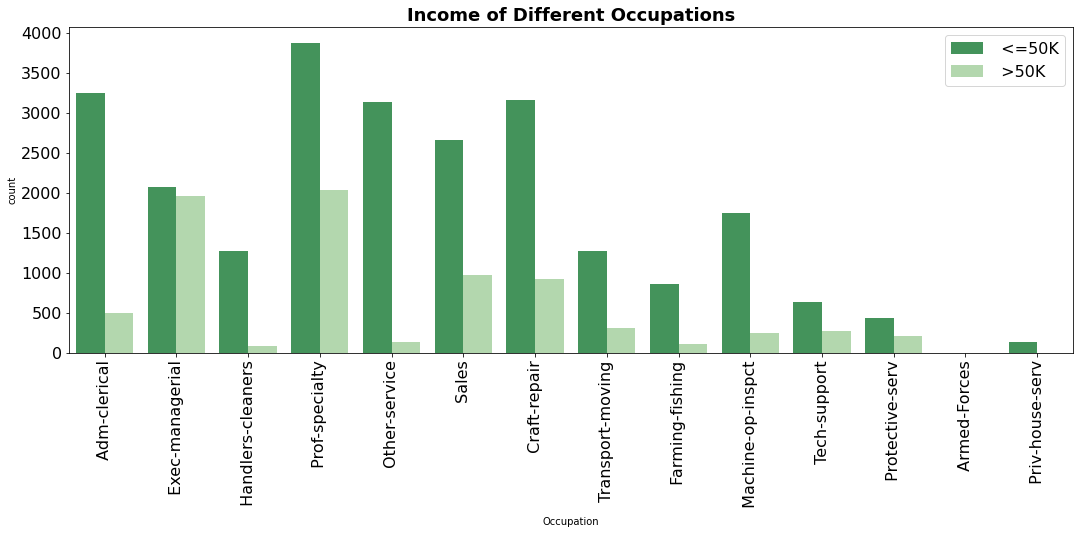

In [36]:
plt.figure(figsize=(18,6))
sns.countplot(df['Occupation'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

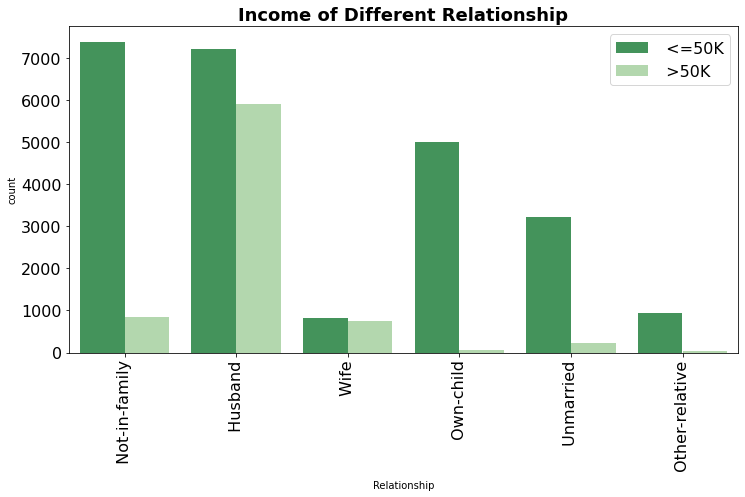

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(df['Relationship'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

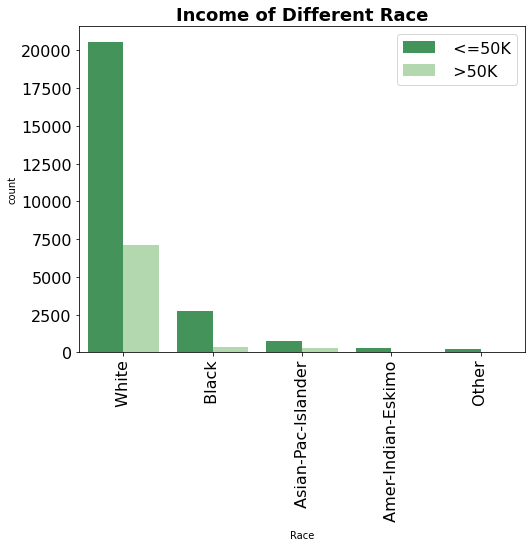

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(df['Race'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Different Race', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

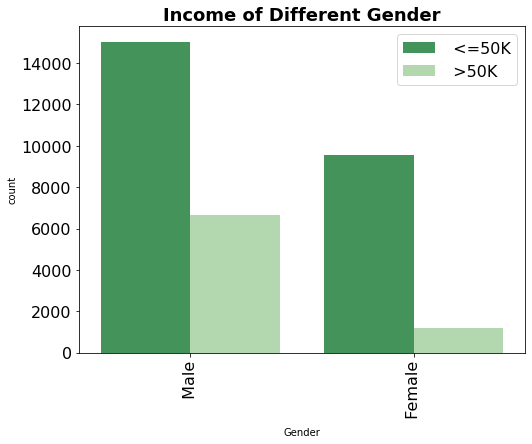

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df['Gender'], hue = df['Income'], palette='Greens_r')
plt.title('Income of Different Gender', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [40]:
#Update the Target variable '<=50K' as  '0' and  '>50K' as '1'
df['Income']=df['Income'].map({' <=50K': 0, ' >50K': 1})

In [41]:
df[['Income']].value_counts(normalize=True).round(decimals=3)*100

Income
0         75.9
1         24.1
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


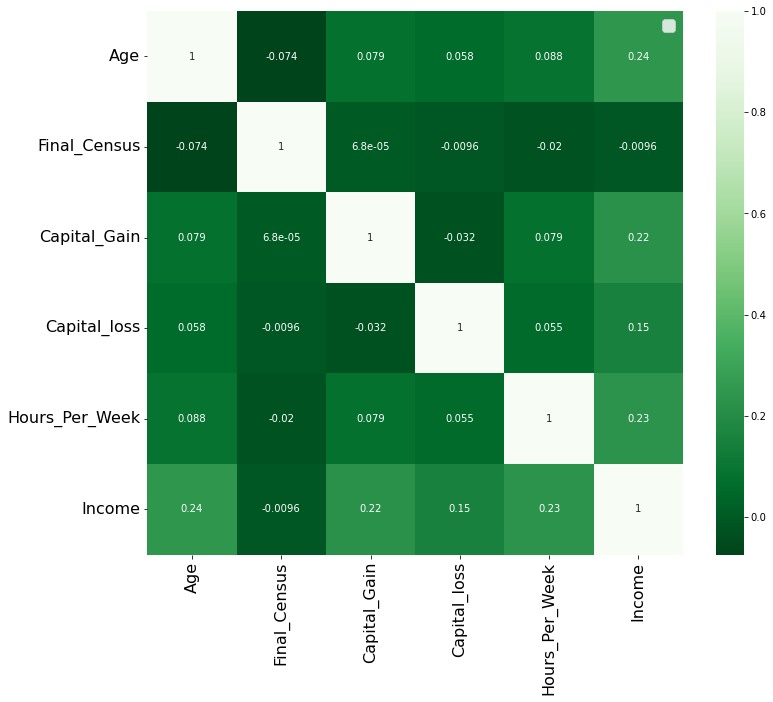

In [42]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=16, rotation = 90)
plt.yticks(fontsize=16, rotation = 0)
plt.legend(fontsize=16)

In [43]:
df.drop("Age_group",axis=1,inplace=True)

In [44]:
#Label encoding the all the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list = ['Profession_Class','Education', 'Marital_Status', 'Occupation', 
            'Relationship', 'Race', 'Gender', 'Country']
df[cat_list]=df[cat_list].apply(lambda x:le.fit_transform(x))

In [45]:
df.head()

,Age,Profession_Class,Final_Census,Education,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_loss,Hours_Per_Week,Country,Income
0,39,6,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,2,9,5,2,0,0,0,40,4,0


In [46]:
#Number of categories in dataset
df.nunique()

Age                    61
Profession_Class        8
Final_Census        21514
Education              16
Marital_Status          7
Occupation             14
Relationship            6
Race                    5
Gender                  2
Capital_Gain          119
Capital_loss           92
Hours_Per_Week         94
Country                41
Income                  2
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


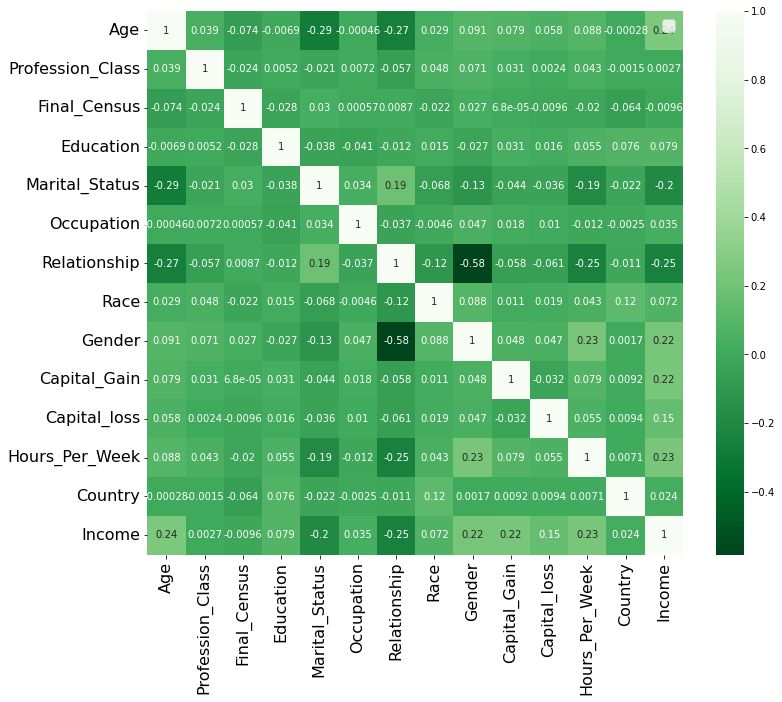

In [47]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=16, rotation = 90)
plt.yticks(fontsize=16, rotation = 0)
plt.legend(fontsize=16)

In [48]:
df.drop('Gender',axis=1,inplace=True)

In [49]:
#Slicing dataset into Independent(x) and Target(y) varibles
x = df.drop('Income', axis=1)
y = df['Income']

In [50]:
y.value_counts()

0    24563
1     7809
Name: Income, dtype: int64

In [51]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [52]:
#Dividing dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [53]:
print(x_train.shape)
print(y_train.shape)

(25897, 12)
(25897,)


In [54]:
#import the necessary libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,f1_score,log_loss,confusion_matrix,classification_report,precision_score,recall_score

In [55]:
#Build the model
classifier_lg = LogisticRegression(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_nb = GaussianNB()
classifier_knn = KNeighborsClassifier()
classifier_rf = RandomForestClassifier(random_state=0)
classifier_xgb = XGBClassifier(random_state=0)

In [56]:
# Instantiate the classfiers and make a list
classifiers = [classifier_lg,
               classifier_dt,
               classifier_nb,
               classifier_knn,
               classifier_rf,
               classifier_xgb]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','Roc Auc','Accuracy',
                                     'F1 Score','log loss','Confusion Matrix','Precision','Recall'])


In [57]:
# Train the models and record the results
for cls in classifiers:
    model = cls.fit(x_train, y_train)
    y_proba = model.predict_proba(x_test)[::,1]
    y_pred = model.predict(x_test)
    print(cls, '\n','Confusion Matrix','\n',confusion_matrix(y_test,  y_pred))
    print('\n','Classification Report','\n',classification_report(y_test,  y_pred))
    print('='*100)
    fpr, tpr, _ = roc_curve(y_test,  y_proba)
    auc = roc_auc_score(y_test, y_proba)
    Accuracy = accuracy_score(y_test,y_pred)
    f1score = f1_score(y_test,y_pred)
    logloss = log_loss(y_test,y_proba)
    cm = confusion_matrix(y_test,  y_pred)
    precision = precision_score(y_test,  y_pred)
    recall = recall_score(y_test,  y_pred)
  
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'Roc Auc':auc,
                                        'Accuracy':Accuracy,
                                        'F1 Score':f1score,
                                        'log loss':logloss,
                                        'Confusion Matrix': cm,
                                        'Precision':precision,
                                        'Recall':recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

LogisticRegression(random_state=0) 
 Confusion Matrix 
 [[4706  207]
 [1082  480]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      4913
           1       0.70      0.31      0.43      1562

    accuracy                           0.80      6475
   macro avg       0.76      0.63      0.65      6475
weighted avg       0.79      0.80      0.77      6475

DecisionTreeClassifier(random_state=0) 
 Confusion Matrix 
 [[4310  603]
 [ 593  969]]

 Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4913
           1       0.62      0.62      0.62      1562

    accuracy                           0.82      6475
   macro avg       0.75      0.75      0.75      6475
weighted avg       0.82      0.82      0.82      6475

GaussianNB() 
 Confusion Matrix 
 [[4683  230]
 [1090  472]]

 Classification Report 
               precision    recall  f1

In [58]:
result_table[['Roc Auc','Accuracy','F1 Score','log loss','Confusion Matrix','Precision','Recall']]

,Roc Auc,Accuracy,F1 Score,log loss,Confusion Matrix,Precision,Recall
classifiers,,,,,,,
LogisticRegression,0.801494,0.800927,0.426856,0.431458,"[[4706, 207], [1082, 480]]",0.69869,0.307298
DecisionTreeClassifier,0.748811,0.81529,0.618379,6.379747,"[[4310, 603], [593, 969]]",0.616412,0.620359
GaussianNB,0.836281,0.796139,0.416961,0.878349,"[[4683, 230], [1090, 472]]",0.672365,0.302177
KNeighborsClassifier,0.839222,0.817297,0.593331,1.368156,"[[4429, 484], [699, 863]]",0.640683,0.552497
RandomForestClassifier,0.901767,0.853282,0.662402,0.366944,"[[4593, 320], [630, 932]]",0.744409,0.596671
XGBClassifier,0.917177,0.862548,0.690542,0.299346,"[[4592, 321], [569, 993]]",0.755708,0.635723


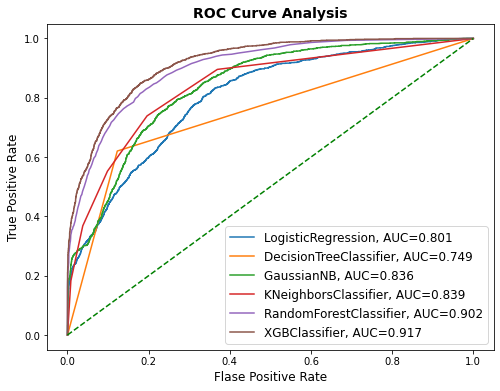

In [59]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['Roc Auc']))
    
plt.plot([0,1], [0,1], color='Green', linestyle='--')
plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('ROC Curve Analysis', fontweight='bold', fontsize=14)
plt.legend(prop={'size':12},loc='lower right')
plt.show()

In [2]:
a = "This is the Python Class"

In [4]:
a.split()

['This', 'is', 'the', 'Python', 'Class']

In [ ]:
b = []
for i in len(a):
    if a(i) = ' ':
        